In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x = np.array([1, 2, 3, 4, 5])
y = np.array([1, 3, 2, 3, 5])
x, y

(array([1, 2, 3, 4, 5]), array([1, 3, 2, 3, 5]))

(0.0, 5.0, 0.0, 5.0)

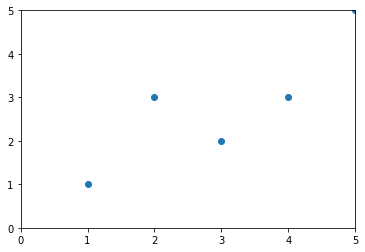

In [3]:
plt.scatter(x, y)
plt.axis([0, 5, 0, 5])

In [4]:
x_mean = np.mean(x)
y_mean = np.mean(y)

In [5]:
num = 0.0
d = 0.0
for x_i, y_i in zip(x, y):
    num += (x_i - x_mean) * (y_i - y_mean)
    d += (x_i - x_mean) ** 2

In [6]:
a = num / d
b = y_mean - a * x_mean
a, b

(0.8, 0.39999999999999947)

In [7]:
y_hat = a * x + b

(0.0, 6.0, 0.0, 6.0)

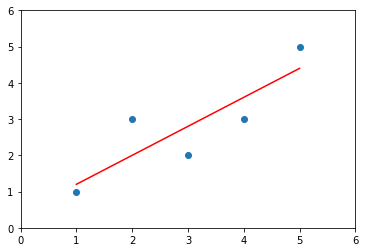

In [8]:
plt.scatter(x, y)
plt.plot(x, y_hat, color='r')
plt.axis([0, 6, 0, 6])

In [9]:
x_predict = 6
y_predict = a * x_predict + b
y_predict

5.2

## 向量化运算

In [10]:
%time
num = (x - x_mean).dot(y - y_mean)
d = (x - x_mean).dot(x - x_mean)

Wall time: 0 ns


In [11]:
a = num / d
b = y_mean - a * x_mean
a, b

(0.8, 0.39999999999999947)

In [12]:
y_hat = a * x + b

(0.0, 6.0, 0.0, 6.0)

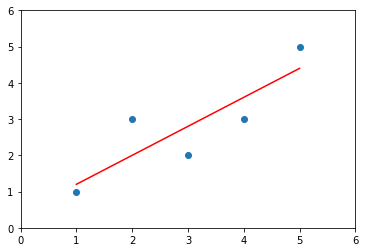

In [13]:
plt.scatter(x, y)
plt.plot(x, y_hat, color='r')
plt.axis([0, 6, 0, 6])

In [14]:
m = 1000000
x = np.random.random(size=m)
y = x * 2 + 3 + np.random.normal(size=m)

## 评价模型
### 波士顿房产数据

In [15]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [16]:
boston = datasets.load_boston()
x, y = boston.data[:, 5], boston.target
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [26]:
x_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target)
x_train.shape, y_train.shape

((379, 13), (379,))

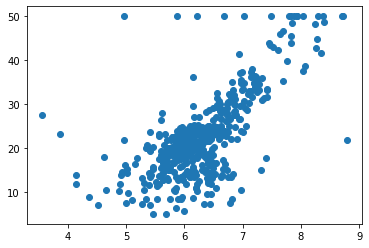

In [18]:
plt.scatter(x, y)

## sklearn中的MSE&MAE

In [19]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

## R Square

In [24]:
# r_square = 1 - mean_squared_error(y_test, y_predict) / np.var(y_test)

In [ ]:
from sklearn.metrics import r2_score

## 多元线性回归

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
reg = LinearRegression()

In [27]:
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
reg.score(x_test, y_test)

0.731694127970755

## kNN Regression

In [29]:
from sklearn.neighbors import KNeighborsRegressor

In [30]:
knn_reg = KNeighborsRegressor().fit(x_train, y_train)

In [31]:
knn_reg.score(x_test, y_test)

0.6056338042439586

In [33]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {
        'weights' : ['uniform'],
        'n_neighbors' : [i for i in range(1, 10)]
    },
    {
        'weights' : ['distance'],
        'n_neighbors' : [i for i in range(1, 10)],
        'p' : [i for i in range(1, 6)]
    }
]

In [34]:
%time
knn_reg = KNeighborsRegressor()
grid_search = GridSearchCV(knn_reg, param_grid=param_grid, n_jobs=-1, 
                           verbose=1).fit(x_train, y_train)

Wall time: 0 ns
Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    3.2s finished


In [35]:
grid_search.best_params_

{'n_neighbors': 7, 'p': 1, 'weights': 'distance'}

In [36]:
# 交叉验证
grid_search.best_score_

0.5067724008995247

In [37]:
# R^2
grid_search.best_estimator_.score(x_test, y_test)

0.7008123196090048